# **Agrupando Flores com K-Means**

Nosso objetivo é agrupar dados do dataset *Iris.csv* utilizando o algoritmo K-Means. Esse dataset contém informações de três tipos de flores, incluindo as rotulagens, muito bem distribuídas. Como o algoritmo K-Means é do tipo *Não Supervisionado*, desconsideraremos a classe na criação do modelo. Uma vez criado o modelo aproveitaremos que temos os valores reais das classes para avaliar a performance do mesmo. 

O dataset pode ser descarregado do link: https://www.kaggle.com/uciml/iris

**Importando as Bibliotecas**

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

**Carregando a Base de Dados**

In [2]:
# Carregando a base de dados e armazenando o resultado na variável "dataset"
dataset = pd.read_csv("Iris.csv")

In [3]:
# Visualizando as 5 primeiras linhas
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Informações do DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Contagem de espécies únicas
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Nosso conjunto de dados tem 6 atributos, o primeiro é um identificador, os 4 seguintes são: o comprimento da sépala, a largura da sépala, o comprimento da pétala e a largura da pétala, em cm, e a última coluna é a classe, com informações das espécies de flores. Temos 3 espécies de flores diferentes: Iris-setosa, Iris-versicolor e Iris-virginica, com 50 amostras para cada classe, totalizando 150 registros.

**Features**

Como o algoritmo K-Means é do tipo *Não Supervisionado*, iremos considerar somente as features para a montagem do modelo. Criamos um novo *DataFrame* que seja uma cópia do "*dataset*" sem as colunas *Species* e *Id*, essa última por ser irrelevante.

In [6]:
# Novo DataFrame contendo apenas as features
X = dataset.drop(["Id", "Species"], axis = 1)

In [7]:
# Visualizando os primeiros 10 registros
X[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Não temos as colunas *Id* e *Species* na variável *X*.

**O Método Elbow**

Um problema comum quando tratamos com métodos de agrupamento é a estimação do parâmetro *k* (número de clusters). O *Método Elbow* (Método do Cotovelo) consiste em definir o número de clusters tal que a variação total dentro do cluster, conhecida como *total within-cluster variation* ou *total within-cluster sum of square* (wss), seja minimizada:

$$minimize\bigg(\sum_{k = 1}^{N}W(C_k)\bigg)$$

onde $C_k$ representa o $k$-ésimo cluster e $W(C_k)$ a variação dentro do cluster. Descrito de outra forma, esse método consiste em determinar a *inércia*, que é o somatório das distâncias ao quadrado de cada objeto de um cluster a seu centroide, isto nos permite medir a compactação de agrupamento e queremos que seja a menor possível. Assim, podemos usar o seguinte algoritmo para definir o número de clusters ideal:

1. Execute o algoritmo de agrupamento (neste caso, o algoritmo K-Means) para diferentes valores de $k$. Por exemplo, $k$ variando de 1 a 10 clusters.
2. Para cada $k$, calcule o *wss*.
3. Trace a curva de *wss* de acordo com o número de clusters $k$.
4. A localização de uma dobra (*knee*) no gráfico é geralmente considerada como um indicador do número apropriado de grupos.

O *Método Elbow* testa a variância dos dados em relação ao número de clusters, sendo o valor ideal de *k* aquele para o qual o aumento de clusters não representa um valor significativo de ganho.

1 680.8243999999996
2 152.36870647733915
3 78.94084142614601
4 57.317873214285726
5 46.535582051282034
6 38.930963049671746
7 34.18920546865629
8 29.881402210510913
9 28.24512748961777


<IPython.core.display.Javascript object>


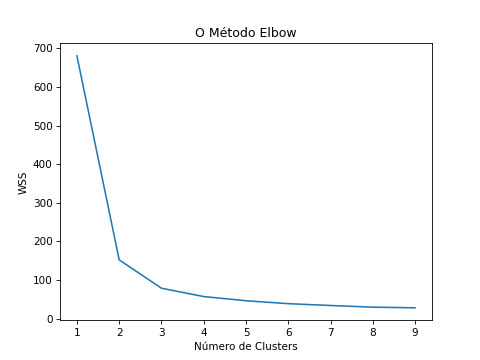

In [8]:
%matplotlib notebook
# Lista que vai acumular os valores dos erros quadráticos
wss = []

for i in range(1, 10):
    # Instancia o K-Means
    kmeans = KMeans(n_clusters = i, init = "random")
    # Faz o agrupamento
    kmeans.fit(X)
    # Calcula o somatório dos erros quadráticos
    wss.append(kmeans.inertia_)
    print(i, wss[-1])
    
plt.plot(range(1, 10), wss)
plt.title("O Método Elbow")
plt.xlabel("Número de Clusters")
# Total Within-Cluster Sum of Square
plt.ylabel("WSS")
plt.show()

Podemos observar que a partir de um número de clusters igual a 3 os erros quadráticos são praticamente estabilizados, não temos uma alteração tão relevante. Baseados no *Método Elbow* o valor do parâmetro *k* ideal seria de 3.

**Instânciando o Algoritmo**

Para instanciar o algoritmo K-Means utilizamos a classe `KMeans` que está armazenada no pacote `cluster`, passamos os atributos `n_clusters` e `init` para definir o número de clusters e o tipo de inicialização, nesse caso: 3 e random, respectivamente.

In [9]:
kmeans = KMeans(n_clusters = 3, init = "random")

*Observação*: Perceba que em cada execução o algoritmo pega uma amostra de dados diferente, para garantir que a saída seja igual em todas suas execuções você pode setar o parâmetro `random_state = 20`, por exemplo.

**Treinando o Algoritmo**

O método `fit` faz o agrupamento propriamente dito.

In [10]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

**Centroides**

O atributo `cluster_centers_` da classe `KMeans` nos retorna os valores dos centroides, os pontos centrais dos grupos, no espaço de parâmetros considerados pelo problema.

In [11]:
# Valores de nossos 3 centroides 
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Cada uma das colunas corresponde a um atributo do *DataFrame X*.

**Distâncias**

O método `fit_transform` recebe como parâmetro a variável *X* e devolve as distâncias entre cada amostra do conjunto de dados e os centroides.

In [12]:
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 5.0595416 , 3.41925061],
       [0.43816892, 5.11494335, 3.39857426],
       [0.41230086, 5.27935534, 3.56935666],
       [0.51883716, 5.15358977, 3.42240962],
       [0.19796969, 5.10433388, 3.46726403],
       [0.68380699, 4.68148797, 3.14673162],
       [0.41520116, 5.21147652, 3.51650264],
       [0.0599333 , 5.00252706, 3.33654987],
       [0.80099438, 5.32798107, 3.57233779],
       [0.36659514, 5.06790865, 3.3583767 ],
       [0.48784424, 4.89806763, 3.32449131],
       [0.25138019, 4.9966845 , 3.31126872],
       [0.49192682, 5.19103612, 3.46661272],
       [0.90906105, 5.65173594, 3.90578362],
       [1.02019214, 5.10804455, 3.646649  ],
       [1.21309192, 4.88564095, 3.49427881],
       [0.66241377, 5.03090587, 3.495248  ],
       [0.1509702 , 5.02342022, 3.38444981],
       [0.82848778, 4.61792995, 3.11245944],
       [0.39898872, 4.97213426, 3.37738931],
       [0.46172719, 4.6955761 , 3.07471224],
       [0.33762701, 4.9236821 , 3.31506588],
       [0.

In [13]:
# Valor de distância para a primeira linha
distance[0]

array([0.14694217, 5.0595416 , 3.41925061])

Por exemplo, a primeira amostra de dados teve um valor de distância de 0.14694217 para o *Cluster 0*, um valor de 5.0595416 para o *Cluster 1* e um valor de 3.41925061 para o *Cluster 2*. Assim, nossa primeira amostra foi atribuída ao *Cluster 0*, pois a distância a ele é menor.

Veremos gráficamente os valores de distância da primeira amostra para cada cluster, para identificar onde ela foi agrupada.

<IPython.core.display.Javascript object>


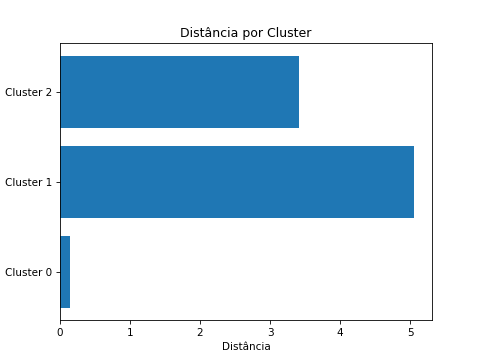

In [14]:
%matplotlib notebook
x = ["Cluster 0", "Cluster 1", "Cluster 2"]
plt.barh(x, distance[0])
plt.xlabel("Distância")
plt.title("Distância por Cluster")
plt.show()

**Rótulos**

O atributo `labels_` da classe `KMeans` retorna os valores de clusters para cada amostra de dados, é como se fossem nossas classes.

In [15]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

**Visualizando os Centroides**

<IPython.core.display.Javascript object>


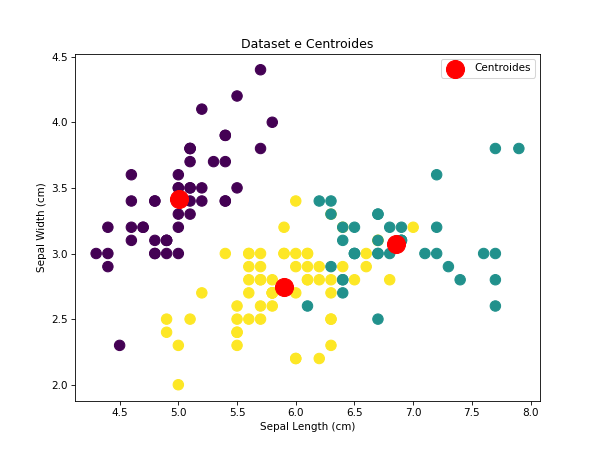

In [16]:
%matplotlib notebook
plt.figure(figsize = (8, 6))
plt.scatter(X["SepalLengthCm"], X["SepalWidthCm"], s = 100, c = labels)
# Dois primeiros atributos dos centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "red", label = "Centroides")
plt.title("Dataset e Centroides")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()

Os centroides são pontos de dados de referências que representam nossos grupos, aonde as distâncias de todas as amostras são calculadas para indicar a quais clusters correspondem. Nossos 3 grupos de dados estão sendo representados pelos 3 centroides.

**Agrupando Novos Dados**

Uma vez treinado o algoritmo podemos agrupar novos dados. Utilizamos o método `predict` e a variável `kmeans`, que tem nosso modelo treinado, passando como parâmetro nossas amostras. O resultado é um array com os respectivos clusters aos quais pertencem.

In [17]:
# Array de dados contendo 3 amostras
data = [[4.5, 3.2, 1.7, 0.1], [5.5, 2.7, 4.1, 1.2], [5.7, 3.2, 5.3, 1.5]]

In [18]:
# Prevendo
kmeans.predict(data)

array([0, 2, 2], dtype=int32)

As primeira, segunda e terceira amostras foram atribuídas aos clusters 0, 2 e 2, respectivamente. 

**Rotulando os Registros**

Criaremos um *DataFrame* contendo os atributos das flores e as classes rotuladas pelo K-Means.

In [19]:
# Fazendo uma cópia do DataFrame X
X2 = X.copy()
# Adicionando uma coluna que contém a classe Cluster
X2['Cluster Class'] = pd.Series(labels, index = X2.index)
# Visualizando os últimos 10 registros
X2[-10:]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster Class
140,6.7,3.1,5.6,2.4,1
141,6.9,3.1,5.1,2.3,1
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,1
144,6.7,3.3,5.7,2.5,1
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,2


## **Comparando os Resultados com os valores reais da Classe**

Aproveitaremos que temos os valores reais das classes para avaliar a performance de nosso modelo. Primeiramente, pegamos a coluna classe do "*dataset*" e convertemos os valores categóricos em numéricos, de tal forma que sejam consistentes com os valores dos clusters, para poder fazer a comparação e realizar a plotagem.

A classe do DataFrame "*dataset*" será armazenada na variável *y*.

In [20]:
# Armazena os valores da classe
y = dataset.Species

In [21]:
# Função que converte valores categóricos a numéricos
def convert_class(s):
    if s == "Iris-setosa":
        return 0
    elif s == "Iris-versicolor":
        return 2
    else:
        return 1

In [22]:
# Aplica a função convert_class a cada um dos dados na variável "y"
y = y.apply(convert_class)

In [23]:
# Contagem de valores únicos
y.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

**Visualização Gráfica dos Resultados e dos valores reais da Classe**

<IPython.core.display.Javascript object>


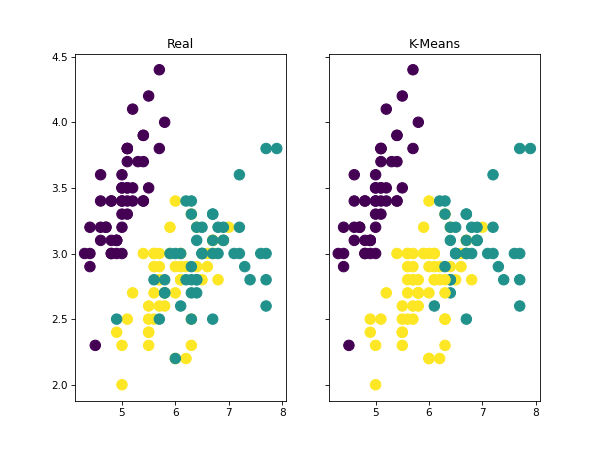

In [29]:
%matplotlib notebook
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (8, 6))
ax1.set_title("Real")
ax1.scatter(X["SepalLengthCm"], X["SepalWidthCm"], s = 100, c = y)
ax2.set_title("K-Means")
ax2.scatter(X["SepalLengthCm"], X["SepalWidthCm"], s = 100, c = labels)
plt.show()

Podemos observar que o algoritmo K-Means, no geral, performou bem, uma das classes foi agrupada corretamente, nas outras duas o algoritmo erro pouco, alguns pontos foram agrupados em clusters diferentes.

## **Técnicas de Validação**

* **Matriz de Confusão**

A Matriz de Confusão nos permite visualizar de forma tabular o contraste entre o valor predito pelo algoritmo e o valor real de nossa classe. Para isso, utilizamos o método `crosstab` da biblioteca Pandas.

In [30]:
pd.crosstab(y, kmeans.labels_, rownames = ["Real"], colnames = ["Predito"], margins = True)

Predito,0,1,2,All
Real,,,,
0,50,0,0,50
1,0,36,14,50
2,0,2,48,50
All,50,38,62,150


Para a classe 0, todas as amostras foram preditas como tais, o algoritmo não errou nenhuma vez. Para a classe 1, 36 amostras foram preditas como pertencendo a aquela classe e 14 foram preditas como pertencendo à classe 2, errou 14 vezes. Para a classe 2, o algoritmo acertou 48 vezes e errou 2, que prediz como classe 1.

* **Métricas de Classificação**

As métricas *precisão*, *revocação*, *medida F1* e *suporte* são calculadas através do método `classification_report` do pacote `metrics` da biblioteca `sklearn`. Estas métricas nos dão uma visão de como o algoritmo se comportou.

In [32]:
clusters = ["Cluster 0", "Cluster 1", "Cluster 2"]
print(metrics.classification_report(y, labels, target_names = clusters))

              precision    recall  f1-score   support

   Cluster 0       1.00      1.00      1.00        50
   Cluster 1       0.95      0.72      0.82        50
   Cluster 2       0.77      0.96      0.86        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



*macro-avg* calcula a média não ponderada por rótulo e *weighted_avg* calcula a média ponderada por rótulo. No nosso caso:

$$\text{score}_{\text{weighted_avg}} = (50/150)*\text{score}_{\text{class 0}} + (50/150)*\text{score}_{\text{class 1}} + (50/150)*\text{score}_{\text{class 2}}$$

$$\text{score}_{\text{macro_avg}} = (1/3)*\text{score}_{\text{class 0}} + (1/3)*\text{score}_{\text{class 1}} + (1/3)*\text{score}_{\text{class 2}}$$

As métricas ponderadas e não ponderadas dão os mesmos resultados porque nossas classes estão balanceadas. O desempenho do algoritmo foi bom.